## <b>Understanding Feedforward Neural Network</b>

In this lab, you are required to build 3 Feedforward Neural Networks to simulate function
<br> $y = xsin( \frac {x^2} {300})$
<br> in range x: +-100
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 2.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> Generate a decent amount of training data in the interval of x.
<br>
<br>All data need to be separated by the same distance.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range and number of points
x_min, x_max, num_points = -100, 100, 10000

# Generate evenly spaced x values
x_values = np.linspace(x_min, x_max, num_points)

# Calculate y values based on the given function
y_values = x_values * np.sin((x_values * x_values)/ 300)


print("x =", x_values, "y =", y_values)




x = [-100.        -99.979998  -99.959996 ...   99.959996   99.979998
  100.      ] y = [-94.05295766 -94.47863179 -94.88725161 ...  94.88725161  94.47863179
  94.05295766]


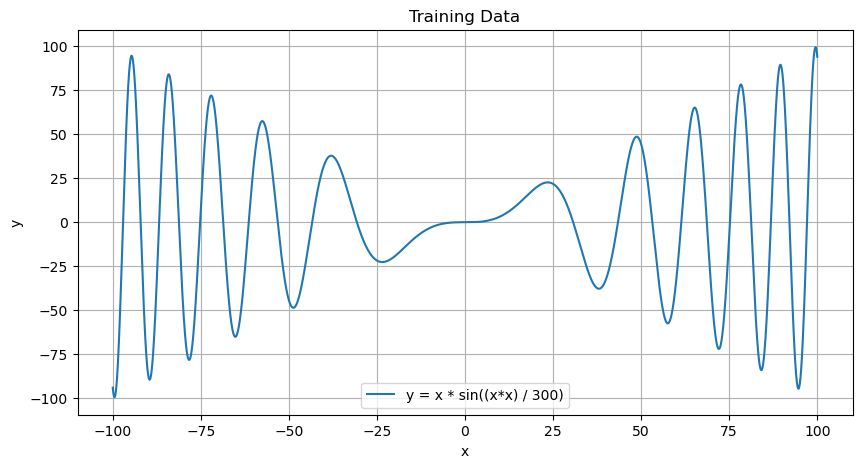

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='y = x * sin((x*x) / 300)')
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Convert x_values and y_values to PyTorch tensors and reshape
import torch

x_values_tensor = torch.tensor(x_values, dtype=torch.float32).view(-1, 1)
y_values_tensor = torch.tensor(y_values, dtype=torch.float32).view(-1, 1)


#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_values_tensor, y_values_tensor, test_size=0.6, random_state=42)


In [6]:
# model 1

import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Input layer to hidden layer
        self.fc2 = nn.Linear(64, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model1 = SimpleNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)



In [7]:
# model 2
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(1, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64) # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 1)   # Second hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize Model 2
model2 = Model2()

# Use the same loss function and optimizer as Model 1
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)




In [8]:
# model 3
class Model3(nn.Module):
    def __init__(self):
        super(Model3, self).__init__()
        self.fc1 = nn.Linear(1, 32)   # Input layer to hidden layer
        self.fc2 = nn.Linear(32, 1)   # Hidden layer to output layer

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Using tanh activation function for hidden layer
        x = self.fc2(x)
        return x

# Initialize Model 3
model3 = Model3()

# Use the same loss function and optimizer as Model 1, with a possible adjustment to the learning rate
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)




#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

In [12]:
# Put the model in evaluation mode
model1.eval()

# No need to track gradients for evaluation
with torch.no_grad():
    y_pred_train = model1(x_train)
    y_pred_test = model1(x_test)

    # Calculate the loss on the training and test data
    train_loss = criterion(y_pred_train, y_train)
    test_loss = criterion(y_pred_test, y_test)

print(f'Training Loss: {train_loss.item()}')
print(f'Test Loss: {test_loss.item()}')





Training Loss: 1696.842529296875
Test Loss: 1740.8326416015625


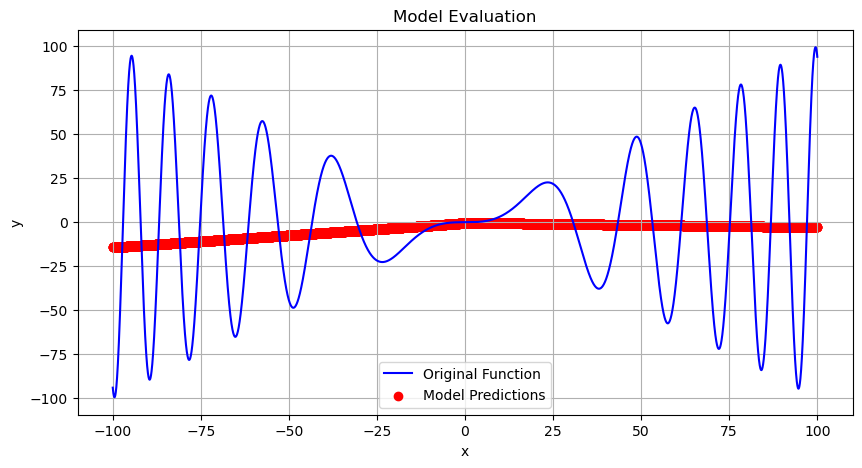

In [13]:
# Convert predictions and actual values to numpy for plotting
y_pred_test_np = y_pred_test.numpy().flatten()
y_test_np = y_test.numpy().flatten()

# Plotting
plt.figure(figsize=(10, 5))

# Plot original function
plt.plot(x_values, y_values, label='Original Function', color='blue')

# Plot model predictions on the test data
plt.scatter(x_test.numpy().flatten(), y_pred_test_np, label='Model Predictions', color='red')

plt.title('Model Evaluation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Put the model in evaluation mode
model2.eval()

# No need to track gradients for evaluation
with torch.no_grad():
    y_pred_train = model2(x_train)
    y_pred_test = model2(x_test)

    # Calculate the loss on the training and test data
    train_loss = criterion(y_pred_train, y_train)
    test_loss = criterion(y_pred_test, y_test)

print(f'Training Loss: {train_loss.item()}')
print(f'Test Loss: {test_loss.item()}')





Training Loss: 1669.6812744140625
Test Loss: 1710.218017578125


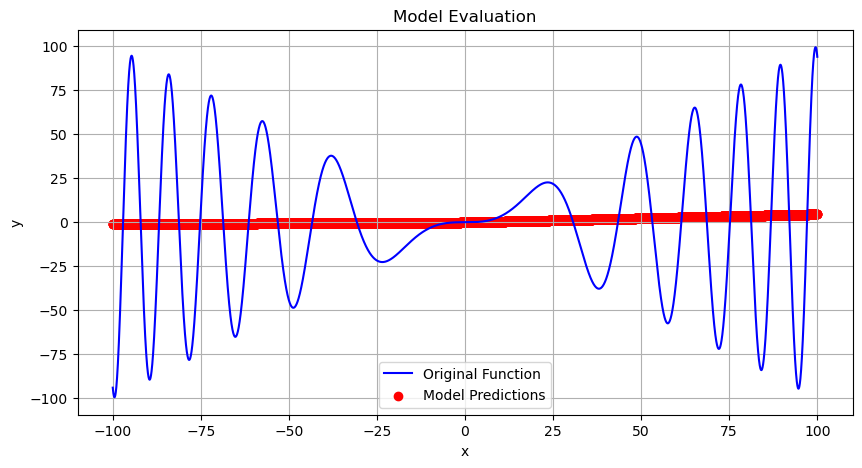

In [15]:
# Convert predictions and actual values to numpy for plotting
y_pred_test_np = y_pred_test.numpy().flatten()
y_test_np = y_test.numpy().flatten()

# Plotting
plt.figure(figsize=(10, 5))

# Plot original function
plt.plot(x_values, y_values, label='Original Function', color='blue')

# Plot model predictions on the test data
plt.scatter(x_test.numpy().flatten(), y_pred_test_np, label='Model Predictions', color='red')

plt.title('Model Evaluation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
# Put the model in evaluation mode
model3.eval()

# No need to track gradients for evaluation
with torch.no_grad():
    y_pred_train = model3(x_train)
    y_pred_test = model3(x_test)

    # Calculate the loss on the training and test data
    train_loss = criterion(y_pred_train, y_train)
    test_loss = criterion(y_pred_test, y_test)

print(f'Training Loss: {train_loss.item()}')
print(f'Test Loss: {test_loss.item()}')





Training Loss: 1670.90478515625
Test Loss: 1709.197021484375


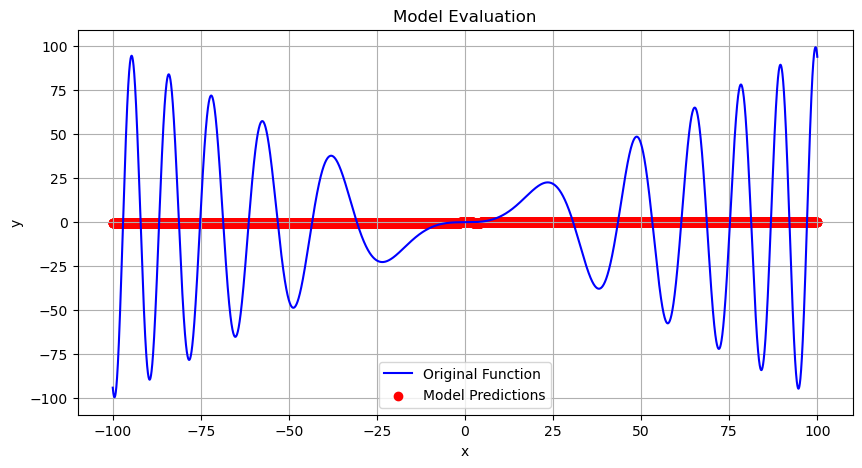

In [18]:
# Convert predictions and actual values to numpy for plotting
y_pred_test_np = y_pred_test.numpy().flatten()
y_test_np = y_test.numpy().flatten()

# Plotting
plt.figure(figsize=(10, 5))

# Plot original function
plt.plot(x_values, y_values, label='Original Function', color='blue')

# Plot model predictions on the test data
plt.scatter(x_test.numpy().flatten(), y_pred_test_np, label='Model Predictions', color='red')

plt.title('Model Evaluation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



#### Part 4 get model output and feedforward by yourself

Recall how a Feedforward Neural Network gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
<br> They should be identical for the first several digitals, if not for all digits.

Model 3 has the lowest test loss

In [19]:
# Accessing weights and biases for Model 3
fc1_weights = model3.fc1.weight.data.numpy()
fc1_bias = model3.fc1.bias.data.numpy()

fc2_weights = model3.fc2.weight.data.numpy()
fc2_bias = model3.fc2.bias.data.numpy()





In [20]:
def manual_feedforward(x, fc1_weights, fc1_bias, fc2_weights, fc2_bias):
    # First Layer Calculations
    z1 = x.dot(fc1_weights.T) + fc1_bias
    a1 = np.tanh(z1)  # Using tanh activation function
    
    # Second Layer Calculations
    z2 = a1.dot(fc2_weights.T) + fc2_bias
    output = z2  # No activation function in the output layer
    return output

# Choose 5 data points from the training set
sample_indices = np.random.choice(x_train.shape[0], 5, replace=False)
sample_x = x_train[sample_indices].numpy()
sample_y = y_train[sample_indices].numpy()

# Manually compute the outputs
manual_outputs = []
for x in sample_x:
    manual_output = manual_feedforward(x, fc1_weights, fc1_bias, fc2_weights, fc2_bias)
    manual_outputs.append(manual_output)

manual_outputs = np.array(manual_outputs).flatten()

# Print the manual outputs
print("Manual Outputs:", manual_outputs)


Manual Outputs: [-0.03134918 -0.29372063 -0.03180271 -0.26283658 -0.00760387]


In [21]:
# Model 3 predictions for the same 5 data points
model3.eval()
with torch.no_grad():
    model_predictions = model3(torch.tensor(sample_x, dtype=torch.float32)).numpy().flatten()

# Print the model predictions
print("Model 3 Predictions:", model_predictions)

# Compare the manual outputs and model predictions
comparison = np.isclose(manual_outputs, model_predictions, atol=1e-6)
print("Are the manual outputs and model predictions close?:", comparison)


Model 3 Predictions: [-0.03134921 -0.29372063 -0.03180271 -0.26283664 -0.00760388]
Are the manual outputs and model predictions close?: [ True  True  True  True  True]
